# Import librairies

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [7]:
# Load Our Dataset
df = pd.read_csv("Downloads\hepatitis.data")

# Data Prep

In [8]:
# Preview the first datapoint
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [9]:
#import dataset
col_names= ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
df = pd.read_csv("Downloads\hepatitis.data", names=col_names)

#Handling of Missing data
#Replace the "?" to nan so that we can trace the 0 value

df = df.replace('?',0)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


# Exploratory Data Analysis (EDA)

In [11]:
#transfer object into int and float

df[['STEROID', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'ALK PHOSPHATE', 'SGOT',
       'PROTIME']] =  df[['STEROID', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'ALK PHOSPHATE', 'SGOT',
       'PROTIME']].astype(int)

df[['BILIRUBIN','ALBUMIN']] = df[['BILIRUBIN','ALBUMIN']].astype(float)

df.dtypes


Class                int64
AGE                  int64
SEX                  int64
STEROID              int32
ANTIVIRALS           int64
FATIGUE              int32
MALAISE              int32
ANOREXIA             int32
LIVER BIG            int32
LIVER FIRM           int32
SPLEEN PALPABLE      int32
SPIDERS              int32
ASCITES              int32
VARICES              int32
BILIRUBIN          float64
ALK PHOSPHATE        int32
SGOT                 int32
ALBUMIN            float64
PROTIME              int32
HISTOLOGY            int64
dtype: object

In [12]:
#Descriptive analytics
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


<AxesSubplot:>

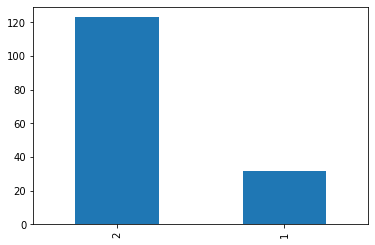

In [13]:
target_label = {"Die":1,"Live":2}
# Value counts
df['Class'].value_counts()
# Plot of Count
df['Class'].value_counts().plot(kind='bar')

In [23]:
df.shape

(155, 20)

# Data Prepocessing

## a) Cleaning data

### 1_checking for duplicate_values

In [14]:
df=df.drop_duplicates()
df.shape

(155, 20)

### 2_ checking for Missing Values

In [15]:
### Missing Values
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

### 3_ Checking for Outliers

#### Method 
+ IQR Interquartile Range

#### how to use it 
+ H-Spread/Mid_spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

In [17]:
IQR

Class               0.00
AGE                18.00
SEX                 0.00
STEROID             1.00
ANTIVIRALS          0.00
FATIGUE             1.00
MALAISE             1.00
ANOREXIA            0.00
LIVER BIG           0.00
LIVER FIRM          1.00
SPLEEN PALPABLE     0.00
SPIDERS             1.00
ASCITES             0.00
VARICES             0.00
BILIRUBIN           0.80
ALK PHOSPHATE      68.50
SGOT               68.50
ALBUMIN             1.15
PROTIME            65.00
HISTOLOGY           1.00
dtype: float64

In [18]:
### Get the actual datapoint that is an outlier where exactly outliers are
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [19]:
### now we are gonna remove all The data points with true (outliers)

df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]
df_no_outlier


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [38]:
### check if its really gone
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


## b) Data transformation and Data Reduction

#### what we are gonna do 

+ Feature Selection and important (remove all attribut that are not important )

#### Method 

+ SelectKbest (to select only important attribut that have a strong relation with the output/target )
+ Recursive Feature Elimination ( then remove them )

### 1_SelectKbest

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [21]:
xfeatures = df[['AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES',
                'VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']]
ylabels = df['Class']

In [22]:
# using Skbest  , we choose how many feauture we want as important , as exemple 10
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [23]:
# Highest score shows the best fit where each feature have score about his relation with output class
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [24]:
# Mapping to Feature Name 
# we put for each score , its name in array , to nsahlo l7ala
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)
best_feat_df


,Feature_Scores,Feature_name
0,28.474819,AGE
1,0.389483,SEX
2,0.399513,STEROID
3,0.186342,ANTIVIRALS
4,2.346432,FATIGUE
5,2.468032,MALAISE
6,0.196481,ANOREXIA
7,0.316982,LIVER BIG
8,0.986710,LIVER FIRM
9,0.745352,SPLEEN PALPABLE


In [25]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,PROTIME
15,47.388208,SGOT
13,30.102472,BILIRUBIN
0,28.474819,AGE
14,17.882705,ALK PHOSPHATE
16,6.873186,ALBUMIN
10,3.189408,SPIDERS
18,3.018547,HISTOLOGY
5,2.468032,MALAISE
4,2.346432,FATIGUE


## 2_Recursive Feature Elimination

RFE we will eliminate the lowest ranting or true

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [27]:
logit = LogisticRegression()
rfe = RFE(logit,8)
rfe_fit = rfe.fit(xfeatures,ylabels)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

In [29]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,AGE,False,8
1,SEX,True,1
2,STEROID,False,5
3,ANTIVIRALS,False,9
4,FATIGUE,True,1
5,MALAISE,True,1
6,ANOREXIA,True,1
7,LIVER BIG,False,4
8,LIVER FIRM,False,6
9,SPLEEN PALPABLE,False,7


# Modle building

+ Feature & Labels
+ Train/Test/Split
+ Building the classication algorithms 
   - Logistic Regression
   - RF
   - DCT
+ Serialize

## a) Feature & Labels

In [41]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
xfeatures

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [43]:
ylabels = df['Class']


In [39]:
# Selected Features
xfeatures_best = df[['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY']]

## b) Train/Test/Split

In order to gain an appropriate evaluation, we split the dataset into the training set and the test set

In [130]:
# train /test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

In [131]:
# train /test dataset for best features
# we divided our data into 80% traing set data and 20% testing set
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=7)

In [132]:
# the first 108 raws is for taining 
x_train_b.shape,y_train_b.shape

((108, 14), (108,))

In [134]:
# and for all the rest raws (47) is for testing data 
x_test_b.shape,y_test_b.shape

((47, 14), (47,))

 then, applying Feature Scaling for better convergence of the algorithm.

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_b = sc.fit_transform(x_train_b)
x_test_b = sc.transform(x_test_b)

In [117]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'none')
classifier.fit(x_train_b, y_train_b)
classifier.intercept_, classifier.coef_

(array([4.33742815]),
 array([[-0.69544444,  5.97416532,  0.37838568, -0.0637171 , -0.30625433,
          0.78013637,  0.62719185, -0.34737598, -1.37721266, -0.49733764,
          0.69032221,  0.84384979, -0.19486209, -0.14477044]]))

In [118]:
y_pred = classifier.predict(x_test_b)
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test_b, y_pred)


0.7419354838709677

In [135]:
y_test_b.shape,y_pred.shape

((47,), (31,))

## c) Building the classication algorithms 

Normally, the independent variables set is not too difficult for Python coder to identify and split it away from the target set. However, as the value of x_0 is insignificant, datasets do not include these values in their capacity to reduce the computational work. Hence, our first task is to create a new row containing all ones to the independent variables set, matching with the definition of matrix X.

In [119]:
import matplotlib.pyplot as plt
from math import exp

In [120]:
def generateXvector(xfeatures_best):
    # Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
     #Parameters:
     #  X:  independent variables matrix
     # Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    vectorX = np.append(np.ones((np.size(xfeatures_best,0), 1)), xfeatures_best ,axis=1)
    return vectorX

In [121]:
X = generateXvector(xfeatures_best)

In [122]:
X

array([[ 1. , 30. ,  2. , ...,  4. ,  0. ,  1. ],
       [ 1. , 50. ,  1. , ...,  3.5,  0. ,  1. ],
       [ 1. , 78. ,  1. , ...,  4. ,  0. ,  1. ],
       ...,
       [ 1. , 61. ,  1. , ...,  4.1,  0. ,  2. ],
       [ 1. , 53. ,  2. , ...,  4.1, 48. ,  2. ],
       [ 1. , 43. ,  1. , ...,  3.1, 42. ,  2. ]])

from math import expFor every Gradient Descent algorithm, it needs to start somewhere before applying the optimized approach to find the minimum of the function. Therefore, we need to generate a vector that contains the initial guess of theta

In [123]:
def theta_init(x):
    # Generate an initial value of vector θ from the original independent variables matrix
      #   Parameters:
        #  X:  independent variables matrix
       # Return value: a vector of theta filled with initial guess
  
    theta = np.random.randn(len(x[0])+1, 1)
    return theta

It will be too complicated if we include the process of calculating the sigmoid value during the Gradient Descent function. Thus, it would be better if we separate these two processes.

In [127]:
# Method to make predictions
def sigmoid_function(x):
    # Calculate the sigmoid value of the inputs
    # Parameters:
    # X:  values
    # Return value: the sigmoid value
    
    return 1/(1+math.e**(-x))

Finally, with enough preparation for the main function, we start building our own Logistics Regression function. First, it takes two matrices as its training instance, a learning rate, and the number of iterations. It first reshapes the matrix y to match with the dimension of the target values vector in the gradient vector formula. The function follows by computing the upgraded gradient for each iteration, leading to a new model parameter vector that reveals a better performance. It then calculates the cost value of each iteration and stores the value to plot the cost function later.

In [125]:
def Logistics_Regression(x,y,learningrate, iterations):
    # Find the Logistics regression model for the data set
     #    Parameters:
      #    X: independent variables matrix
       #   y: dependent variables matrix
        #  learningrate: learningrate of Gradient Descent
         # iterations: the number of iterations
     #   Return value: the final theta vector and the plot of cost function
  
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

## c) Examining our Algorithm

In [138]:
Logistics_Regression(x_train_b,y_train_b, 1, 1000)

ValueError: Data must be 1-dimensional